In [1]:
# OBSERVATIONS AND INSIGHTS

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
                      
# Display the data table for preview
mice_study_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [136]:
# Checking the number of mice.
mice_study = mice_study_merged["Mouse ID"].nunique()
mice_study

249

In [137]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_study_merged.loc[mice_study_merged.duplicated(subset=["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [138]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
mice_study_clean = mice_study_merged.loc[mice_study_merged["Mouse ID"]!='g989']
mice_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [139]:
mice_study_final = mice_study_clean["Mouse ID"].nunique()
mice_study_final

248

In [140]:
# SUMMARY STATISTICS

# Generate summary statistics table of mean, median, variance, standard deviation, and SEM of tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mice_study_mean = mice_study_clean.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
mice_study_mean

mice_study_median = mice_study_clean.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
mice_study_median

mice_study_variance = mice_study_clean.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
mice_study_variance

mice_study_stdev = mice_study_clean.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
mice_study_stdev

mice_study_sem = mice_study_clean.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
mice_study_sem

# Assemble the resulting series into a single summary dataframe.
mice_stats_summary = pd.DataFrame({"Mean": mice_study_mean,"Median": mice_study_median,"Variance": mice_study_variance,
                                   "Std Dev": mice_study_stdev, "SEM": mice_study_sem})
mice_stats_summary

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [141]:
# Generate summary statistics table of mean, median, variance, standard deviation, SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mice_study_groupby = mice_study_clean.groupby("Drug Regimen")

mice_stats_summary_agg = mice_study_groupby.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
mice_stats_summary_agg                                           

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64


Text(0, 0.5, 'Total Measurements')

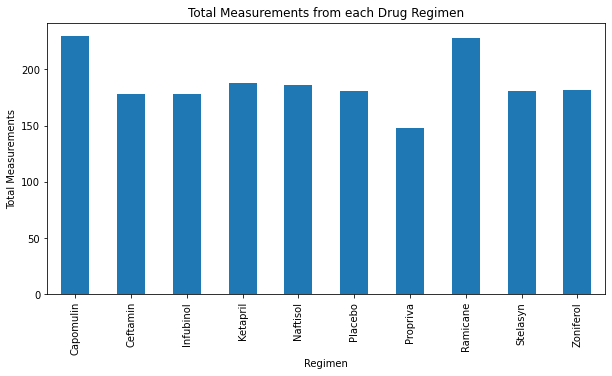

In [142]:
# BAR AND PIE CHARTS

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_study_total_measurements = mice_study_clean.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
print(mice_study_total_measurements)

mice_study_total_measurements.plot(kind="bar", figsize=(10,5))

plt.title("Total Measurements from each Drug Regimen")
plt.xlabel("Regimen")
plt.ylabel("Total Measurements")

Text(0, 0.5, 'Measurements')

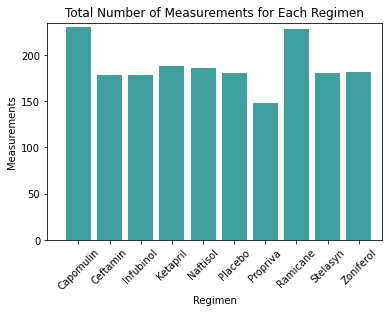

In [143]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

x_axis = np.arange(len(mice_study_total_measurements))

plt.bar(x_axis, measurements, color = 'teal', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
                           "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],rotation=45)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(measurements)+5)

plt.title("Total Number of Measurements for Each Regimen")
plt.xlabel("Regimen")
plt.ylabel("Measurements")

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Number of Unique Mice')

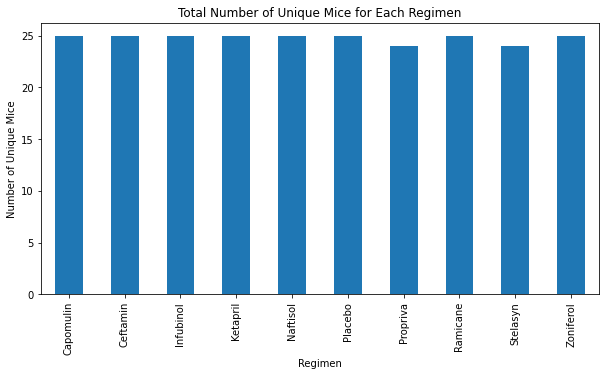

In [144]:
# Generate a bar chart depicting the number of unique mice for each treatment regimen

mice_study_unique = mice_study_clean.groupby("Drug Regimen").nunique()["Mouse ID"]
print(mice_study_unique)

mice_study_unique.plot(kind="bar", figsize=(10,5))

plt.title(f"Total Number of Unique Mice for Each Regimen")
plt.xlabel(f"Regimen")
plt.ylabel(f"Number of Unique Mice")

Text(0, 0.5, 'Number of Unique Mice')

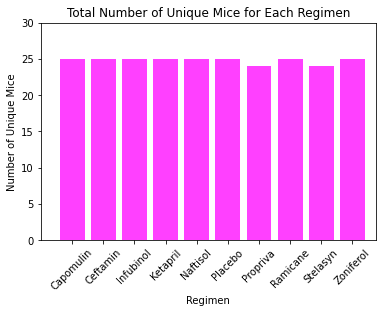

In [145]:
# Generate a bar plot showing the total number of unique mice treated using pyplot
study_unique = [25, 25, 25, 25, 25, 25, 24, 25, 24, 25]

x_axis = np.arange(len(mice_study_unique))

plt.bar(x_axis, study_unique, color="magenta", alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                             "Ramicane", "Stelasyn", "Zoniferol"], rotation=45)

plt.xlim(-1, len(x_axis)-0.25)
plt.ylim(0, max(study_unique)+5)

plt.title(f"Total Number of Unique Mice for Each Regimen")
plt.xlabel(f"Regimen")
plt.ylabel(f"Number of Unique Mice")

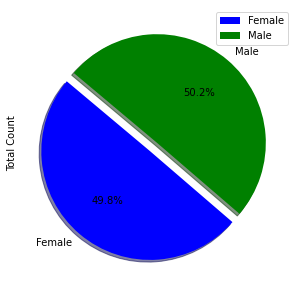

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

groupby_gender = mice_study_merged.groupby(["Mouse ID", "Sex"])
groupby_gender
                                 
mice_gender_df = pd.DataFrame(groupby_gender.size())

mice_gender = pd.DataFrame(mice_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]
                                     
mice_gender["Percentage of Sex"] = (100*(mice_gender["Total Count"]/mice_gender["Total Count"].sum()))
mice_gender["Percentage of Sex"] = mice_gender["Percentage of Sex"]
mice_gender

colors = ['blue','green']
explode = (0.1,0)
plot = mice_gender.plot.pie(y='Total Count', figsize=(5,5), colors=colors, startangle=140, explode=explode, 
                            shadow=True, autopct="%1.1f%%")


(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

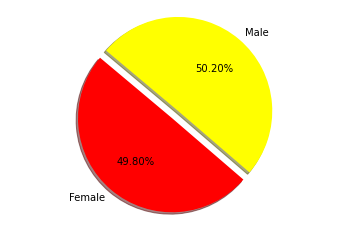

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.799197,50.200803]
colors=['red', 'yellow']
explode=(0.1,0)
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")

In [148]:
# QUARTILES, OUTLIERS, BOXPLOTS

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_study_timepoint = mice_study_clean.groupby("Mouse ID")["Timepoint"].max()
mice_study_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mice_study_timepoint = pd.merge(mice_study_clean, mice_study_timepoint, on=["Mouse ID", "Timepoint"])
merged_mice_study_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [149]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# Determine outliers using upper and lower bounds
for treatments in treatments_list:
    capomulin_df = merged_mice_study_timepoint.loc[merged_mice_study_timepoint["Drug Regimen"] == treatments]
    quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    upper_limit = upper_quartile+(iqr*1.5)
    lower_limit = lower_quartile-(iqr*1.5)
    outliers = capomulin_df.loc[(capomulin_df["Tumor Volume (mm3)"] > upper_limit) | (capomulin_df["Tumor Volume (mm3)"] < lower_limit), "Tumor Volume (mm3)"] 
                                
    print(f"The lower quartile of tumor size is: {lower_quartile}")
    print(f"The upper quartile of tumor size is: {upper_quartile}")
    print(f"The interquartile range of tumor size is: {iqr}")
    print(f"The median of tumor size is: {quartiles[0.5]}")
    print(f"The outliers are: {outliers}")
    print()

The lower quartile of tumor size is: 32.37735684
The upper quartile of tumor size is: 40.1592203
The interquartile range of tumor size is: 7.781863460000004
The median of tumor size is: 38.125164399999996
The outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)

The lower quartile of tumor size is: 48.72207785
The upper quartile of tumor size is: 64.29983003
The interquartile range of tumor size is: 15.577752179999997
The median of tumor size is: 59.85195552
The outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)

The lower quartile of tumor size is: 54.04860769
The upper quartile of tumor size is: 65.52574285
The interquartile range of tumor size is: 11.477135160000003
The median of tumor size is: 60.16518046
The outliers are: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64

The lower quartile of tumor size is: 31.56046955
The upper quartile of tumor size is: 40.65900627
The interquartile range of tumor size is: 9.098536719999998
The median of tum

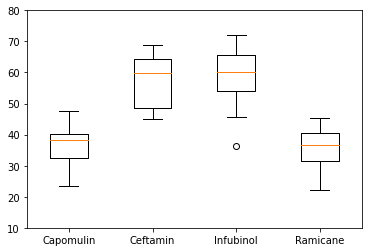

In [150]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_boxplot = merged_mice_study_timepoint.reset_index()

tumor_lists = final_tumor_boxplot.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)

tumor_df = pd.DataFrame(tumor_lists)
tumor_df = tumor_df.reindex(treatments_list)

final_volumes = [volume for volume in tumor_df["Tumor Volume (mm3)"]]

plt.boxplot(final_volumes, labels=treatments_list)
plt.ylim(10,80)
plt.show()

Text(0, 0.5, 'Volume of Tumor (mm3)')

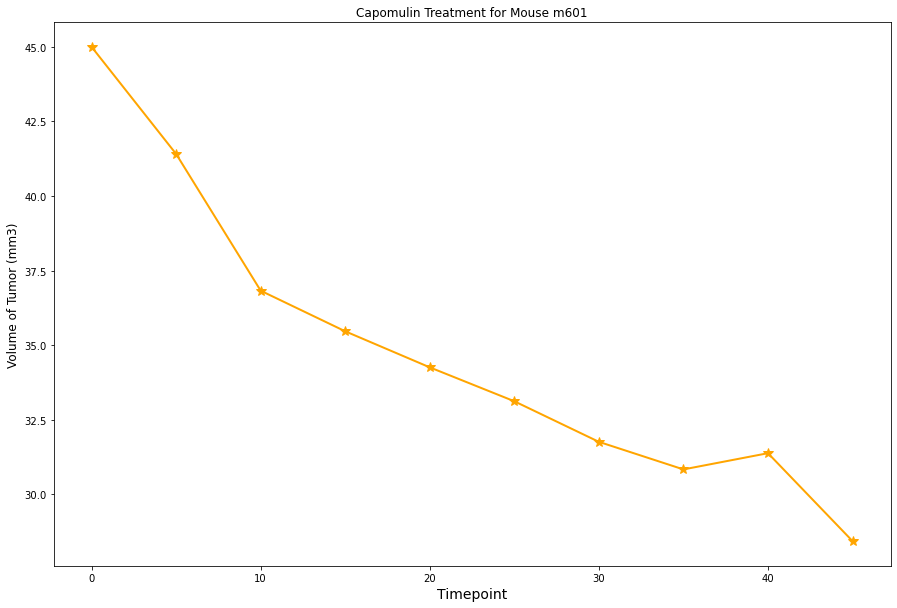

In [151]:
# LINE AND SCATTER PLOTS

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mice_study_clean.loc[mice_study_clean["Drug Regimen"] == "Capomulin"]
tumorvol_vs_time = mice_study_clean[mice_study_clean["Mouse ID"].isin(["m601"])]
tumorvol_vs_time

x_axis = tumorvol_vs_time["Timepoint"]
size_tumor = tumorvol_vs_time["Tumor Volume (mm3)"]


fig1, ax1 = plt.subplots(figsize=(15,10))
plt.title("Capomulin Treatment for Mouse m601")
plt.plot(x_axis, size_tumor, linewidth=2, markersize=10, marker="*", color="orange", label="Farenheit")
plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Volume of Tumor (mm3)", fontsize=12)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

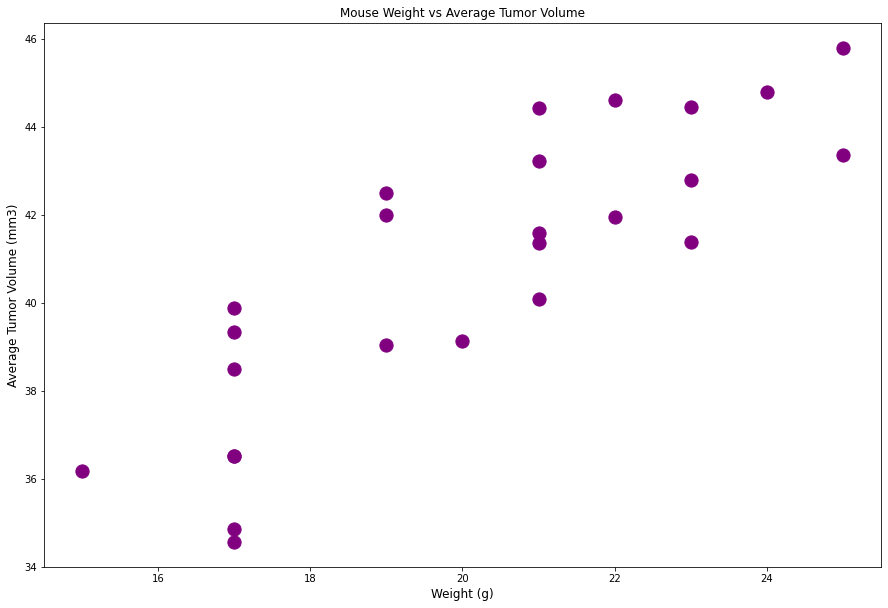

In [152]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15,10))
avg_capomulin = capomulin.groupby(["Mouse ID"]).mean()
marker_size=20
plt.scatter(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"], s=175, color="purple")
plt.title("Mouse Weight vs Average Tumor Volume", fontsize=12)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)           

In [153]:
# CORRELATION AND REGRESSION

# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between average weight and tumor volume is: {correlation}")

The correlation coefficient between average weight and tumor volume is: 0.84


In [154]:
x_values = avg_capomulin["Weight (g)"]
y_values = avg_capomulin["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values *slope) + intercept

print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"rvalue (Correlation coefficent): {rvalue}")
print(f"pandas (Correlation coefficient): {correlation}")
print(f"stderr: {stderr}")

eq_line = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
print(eq_line)

slope: 0.9544396890241045
intercept: 21.552160532685015
rvalue (Correlation coefficent): 0.8419363424694718
pandas (Correlation coefficient): 0.84
stderr: 0.1275435903320134
y = 0.95x 21.55


R squared value is: 0.7088568047708717


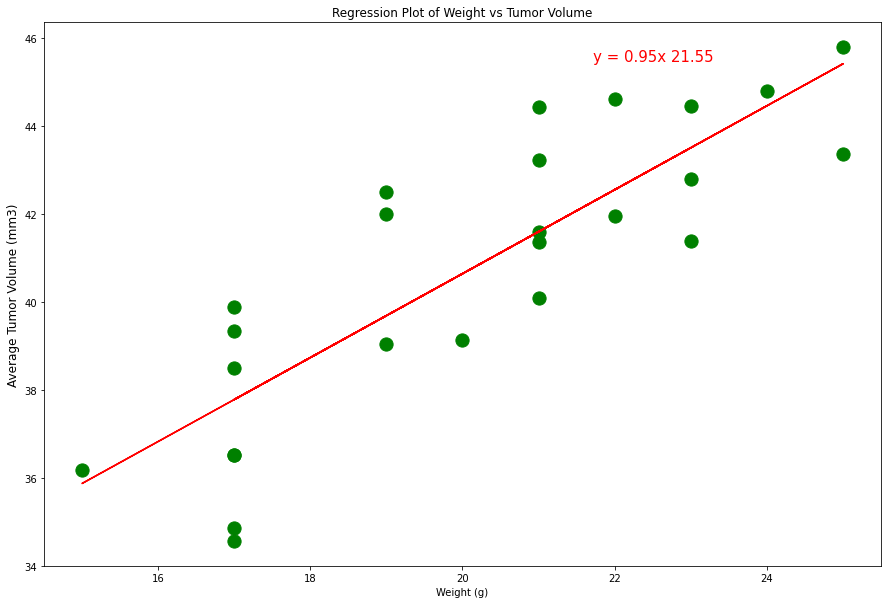

In [155]:
# Generate a scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values,y_values,s=175,color="green")
plt.plot(x_values,regress_values,"r-")
plt.title("Regression Plot of Weight vs Tumor Volume", fontsize=12)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
ax1.annotate(eq_line, xy=(20,40), xycoords="data", xytext=(0.8, 0.95), textcoords="axes fraction", 
             horizontalalignment= 'right', verticalalignment="top",fontsize = 15, color="red")
print(f"R squared value is: {rvalue**2}")                     

In [ ]:
# OBSERVATIONS AND INSIGHTS

# The correlation (r-value) between the weight and average volume of tumor is 0.84. This number indicates a strong 
# correlation between the two values. Therefore, as mouse weight increases, the average tumor volume increases as well. 

# The correlation coefficient (r-squared value) is 0.71. This indicates that there is seventy-one percent fit between
# the model and the data. Therefore, the model provides a fairly good method to predict data.